In [2]:
import numpy as np
import pandas as pd
from textblob import TextBlob
import plotly.graph_objects as go
import plotly.express as xp
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [3]:
modi = pd.read_csv("modi_reviews.csv")
rahul = pd.read_csv("rahul_reviews.csv")

In [4]:
modi.head(3)

,Unnamed: 0,User,Tweet
0,0,advosushildixit,@anjanaomkashyap I am seeing you as future #bj...
1,1,jiaeur,#LokSabhaElections2019 \n23rd May 2019 will re...
2,2,PVenkatGandhi,#LokSabhaElections2019 \n23rd May 2019 will re...


In [5]:
modi.shape

(25688, 3)

In [6]:
rahul.head(3)

,Unnamed: 0,User,Tweet
0,0,Sunnysweet16,Wonder why no academic or journalist asks INC ...
1,1,drnitinchaube,Congrats for the change #australiavotes2019 an...
2,2,mrvivek07,Peopel Say “Govt Ne 70 Years Kya kiya”.\nUnse ...


In [7]:
rahul.shape

(14261, 3)

In [8]:
modi['Tweet'][0]

'@anjanaomkashyap I am seeing you as future #bjp spokesperson..\nGood luck. Anjana Om Modi oops Kashyap.\nJournalists like you changed the meaning of journalism. Janta maaf nai karege'

In [9]:
TextBlob(modi['Tweet'][0]).sentiment

Sentiment(polarity=0.35, subjectivity=0.36250000000000004)

In [10]:
rahul['Tweet'][10]

'@IYCTelangana @IncBasavakalyan @narendramodi @IYC @INCIndia @RahulGandhi @priyankagandhi @HardikPatel_ @Allavaru @keshavyadaviyc @srinivasiyc @srivatsayb @RakshaRamaiah @JM_Scindia This is called in #BJP language,\n"A Swatch &amp; Swasth Hindutva" !!! This theory not applicable to any other person, except #BJPians! \nQuestion: Demonic possession of !!!!'

In [11]:
TextBlob(rahul['Tweet'][10]).sentiment

Sentiment(polarity=-0.3814697265625, subjectivity=0.375)

In [12]:
modi['Tweet'] = modi['Tweet'].astype(str)
rahul['Tweet'] = rahul['Tweet'].astype(str)

def find_polarity(review):
    return TextBlob(review).sentiment.polarity

In [13]:
find_polarity('I love coding and hate studying.')

-0.15000000000000002

In [14]:
find_polarity('I love coding')

0.5

In [15]:
find_polarity('I am living')

0.0

In [16]:
modi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25688 entries, 0 to 25687
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  25688 non-null  int64 
 1   User        25683 non-null  object
 2   Tweet       25688 non-null  object
dtypes: int64(1), object(2)
memory usage: 602.2+ KB


In [17]:
modi['polarity'] = modi['Tweet'].apply(find_polarity)
rahul['polarity'] = rahul['Tweet'].apply(find_polarity)

In [18]:
modi

,Unnamed: 0,User,Tweet,polarity
0,0,advosushildixit,@anjanaomkashyap I am seeing you as future #bj...,0.350000
1,1,jiaeur,#LokSabhaElections2019 \n23rd May 2019 will re...,0.800000
2,2,PVenkatGandhi,#LokSabhaElections2019 \n23rd May 2019 will re...,0.800000
3,3,TheNirbhay1,PM Modi creates a new record of being the only...,0.312121
4,4,ShakeChilli,@abhijitmajumder Appointment of Successor! \n\...,0.098788
...,...,...,...,...
25683,25683,shv_indian,#1DDrive #ModiSpeaksToNews18 #LokSabhaElection...,0.000000
25684,25684,SONUPINKOO,I am seriously worried about future of Indian ...,0.209524
25685,25685,SONUPINKOO,If @narendramodi is so Bad then Why does @INCI...,-0.700000
25686,25686,SONUPINKOO,"On this 23rd March (Pakistan Day), I Urge all ...",0.000000


In [19]:
rahul

,Unnamed: 0,User,Tweet,polarity
0,0,Sunnysweet16,Wonder why no academic or journalist asks INC ...,0.218750
1,1,drnitinchaube,Congrats for the change #australiavotes2019 an...,0.000000
2,2,mrvivek07,Peopel Say “Govt Ne 70 Years Kya kiya”.\nUnse ...,0.000000
3,3,JosephPravinP,"@ajaymaken @RahulGandhi And as a final touch, ...",0.320000
4,4,VandanaMegastar,#LokSabhaElections2019 Anyone not having mass ...,-0.166667
...,...,...,...,...
14256,14256,SunjayJK,"@quizzicalguy In this #LokSabhaElections2019, ...",0.000000
14257,14257,SunjayJK,@AnumaVidisha @RahulGandhi @ArvindKejriwal whe...,-0.500000
14258,14258,RAMANKAIRA,@sherryontopp Early morning #political move af...,0.080000
14259,14259,RAMANKAIRA,@mayankgandhi04 @mallesh_2004 Early morning #p...,0.080000


In [20]:
modi['Label'] = np.where(modi['polarity']>0,'positive','negative')
modi['Label'][modi['polarity']==0]='neutral'

rahul['Label'] = np.where(rahul['polarity']>0,'positive','negative')
rahul['Label'][rahul['polarity']==0]='neutral'

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14100\4292824417.py:2: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


C:\Users\ASUS\AppData\Local\Temp\ipykernel_14100\4292824417.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy

In [21]:
modi.head(10)

,Unnamed: 0,User,Tweet,polarity,Label
0,0,advosushildixit,@anjanaomkashyap I am seeing you as future #bj...,0.350000,positive
1,1,jiaeur,#LokSabhaElections2019 \n23rd May 2019 will re...,0.800000,positive
2,2,PVenkatGandhi,#LokSabhaElections2019 \n23rd May 2019 will re...,0.800000,positive
3,3,TheNirbhay1,PM Modi creates a new record of being the only...,0.312121,positive
4,4,ShakeChilli,@abhijitmajumder Appointment of Successor! \n\...,0.098788,positive
5,5,UttarrPradesh,Which of the following should be top priority ...,0.250000,positive
6,6,Mdsr20351488,After 5yrs of Modi 🙁\n\n-SC vs SC\n-EC vs EC\n...,0.000000,neutral
7,7,ShaileshWrites,@RenukaJain6\nI still remember your video mass...,-0.500000,negative
8,8,iamljp,#bjp @BJP4India @INCIndia @INCKarnataka how mu...,-0.342857,negative
9,9,TheShobhitAzad,#AzadPrediction\n#LokSabhaElections2019 \n\nBJ...,0.000000,neutral


In [22]:
rahul.head(10)

,Unnamed: 0,User,Tweet,polarity,Label
0,0,Sunnysweet16,Wonder why no academic or journalist asks INC ...,0.218750,positive
1,1,drnitinchaube,Congrats for the change #australiavotes2019 an...,0.000000,neutral
2,2,mrvivek07,Peopel Say “Govt Ne 70 Years Kya kiya”.\nUnse ...,0.000000,neutral
3,3,JosephPravinP,"@ajaymaken @RahulGandhi And as a final touch, ...",0.320000,positive
4,4,VandanaMegastar,#LokSabhaElections2019 Anyone not having mass ...,-0.166667,negative
5,5,RGspeak,@INCIndia should release a video of @RahulGand...,0.400000,positive
6,6,SandipGhose,@thakkar_sameet @BDUTT @surjitbhalla 4/n smack...,0.000000,neutral
7,7,__Shivampandey,"Rahul Gandhi Spotted in Switzerland, 1 hour ag...",0.350000,positive
8,8,usman_majid1,BJP will be nowhere in India after May 23. BJP...,0.000000,neutral
9,9,pintoo2060,#Punjab \nBhatinda- cong- Sad neck to neck \n...,-0.175000,negative


In [23]:
neutral_modi = modi[modi['polarity']==0.0000]
neutral_modi

,Unnamed: 0,User,Tweet,polarity,Label
6,6,Mdsr20351488,After 5yrs of Modi 🙁\n\n-SC vs SC\n-EC vs EC\n...,0.0,neutral
9,9,TheShobhitAzad,#AzadPrediction\n#LokSabhaElections2019 \n\nBJ...,0.0,neutral
10,10,sheikh541,#BJP was renamed as Safroon Party then again i...,0.0,neutral
20,20,UdayiCODE,I am seeing 3 Options for PM this time #Modi #...,0.0,neutral
21,21,SandipGhose,@thakkar_sameet @BDUTT @surjitbhalla 4/n smack...,0.0,neutral
...,...,...,...,...,...
25674,25674,CrazySatire,Poll:\nWhich province (s) of Pakistan after di...,0.0,neutral
25676,25676,SunjayJK,@IASassociation MT:We stand by our @IPS_Associ...,0.0,neutral
25682,25682,CrazySatire,No one calling that ‘BJP is communal’ in this ...,0.0,neutral
25683,25683,shv_indian,#1DDrive #ModiSpeaksToNews18 #LokSabhaElection...,0.0,neutral


In [24]:
remove_neutral_modi = modi['polarity'].isin(neutral_modi['polarity'])
modi.drop(modi[remove_neutral_modi].index,inplace=True)

In [25]:
print(neutral_modi.shape)
print(modi.shape)

(8206, 5)
(17482, 5)


In [26]:
neutral_rahul = rahul[rahul['polarity']==0.0000]
neutral_rahul

,Unnamed: 0,User,Tweet,polarity,Label
1,1,drnitinchaube,Congrats for the change #australiavotes2019 an...,0.0,neutral
2,2,mrvivek07,Peopel Say “Govt Ne 70 Years Kya kiya”.\nUnse ...,0.0,neutral
6,6,SandipGhose,@thakkar_sameet @BDUTT @surjitbhalla 4/n smack...,0.0,neutral
8,8,usman_majid1,BJP will be nowhere in India after May 23. BJP...,0.0,neutral
12,12,mayursejpal,My Predictions\n\nBJP+NDA = 300 to 310\nCongre...,0.0,neutral
...,...,...,...,...,...
14238,14238,vishantsarkar,@RahulGandhi The year has come 2019 when Natio...,0.0,neutral
14240,14240,CrazySatire,@nmannathukkaren @ShashiTharoor Modi’s fate wi...,0.0,neutral
14252,14252,CrazySatire,No one calling that ‘BJP is communal’ in this ...,0.0,neutral
14255,14255,SONUPINKOO,I need Answer from @INCIndia @RahulGandhi @_Ma...,0.0,neutral


In [27]:
remove_neutral_rahul = rahul['polarity'].isin(neutral_rahul['polarity'])
rahul.drop(rahul[remove_neutral_rahul].index,inplace=True)

In [28]:
print(neutral_rahul.shape)
print(rahul.shape)

(4894, 5)
(9367, 5)


In [29]:
print(modi.shape)
print(rahul.shape)

(17482, 5)
(9367, 5)


In [30]:
#modi
np.random.seed(10)
remove_n = 8182
drop_indicies = np.random.choice(modi.index,remove_n,replace=False)
df_modi = modi.drop(drop_indicies)

In [31]:
df_modi.shape

(9300, 5)

In [32]:
#rahul
np.random.seed(10)
remove_n = 67
drop_indicies = np.random.choice(rahul.index,remove_n,replace=False)
df_rahul = rahul.drop(drop_indicies)

In [33]:
df_rahul.shape

(9300, 5)

# Prediction about indian election

In [34]:
modi_count = df_modi.groupby('Label').count()
modi_count

,Unnamed: 0,User,Tweet,polarity
Label,,,,
negative,2710,2710,2710,2710
positive,6590,6590,6590,6590


In [35]:
neg_modi = (modi_count['polarity'][0]/1000)*100
print(neg_modi)

271.0


C:\Users\ASUS\AppData\Local\Temp\ipykernel_14100\1604031457.py:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [36]:
pos_modi = (modi_count['polarity'][1]/1000)*100
print(pos_modi)

659.0


C:\Users\ASUS\AppData\Local\Temp\ipykernel_14100\3828785484.py:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [37]:
rahul_count = df_rahul.groupby('Label').count()
rahul_count

,Unnamed: 0,User,Tweet,polarity
Label,,,,
negative,3151,3151,3151,3151
positive,6149,6149,6149,6149


In [38]:
neg_rahul = (rahul_count['polarity'][0]/1000)*100
print(neg_rahul)

315.09999999999997


C:\Users\ASUS\AppData\Local\Temp\ipykernel_14100\501401589.py:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [39]:
pos_rahul = (rahul_count['polarity'][1]/1000)*100
print(pos_rahul)

614.9


C:\Users\ASUS\AppData\Local\Temp\ipykernel_14100\1962226632.py:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [40]:
politicians = ['modi','rahul']

neg_list = [neg_modi,neg_rahul]

pos_list = [pos_modi,pos_rahul]

iplot = go.Figure(data = [go.Bar(name='negative',x=politicians,y=neg_list),go.Bar(name='positive',x=politicians,y=pos_list)])
iplot.update_layout(barmode='group')
iplot.show()

In [41]:
iplot.write_html('plotly_figure.html')

In [42]:
if (pos_modi>pos_rahul,neg_modi<neg_rahul):
    result = "Based on the given dataset Modi will win the elections for 2024"
else:
    result = "Based on the given dataset Rahul will win the elections for 2024"

print(result)

Based on the given dataset Modi will win the elections for 2024


In [43]:
import pickle

myvar = [result]

with open('file.pk1', 'wb') as file:

        pickle.dump(myvar, file)

In [44]:
#import pickle

#if (pos_modi>pos_rahul,neg_modi<neg_rahul):
    #myvar = ['modi will win']

    #with open('file.pk1', 'wb') as file:

        #pickle.dump(myvar, file)
#else:
    #myvar = ['rahul will win']

    #with open('file.pk1', 'wb') as file:

        #pickle.dump(myvar, file)


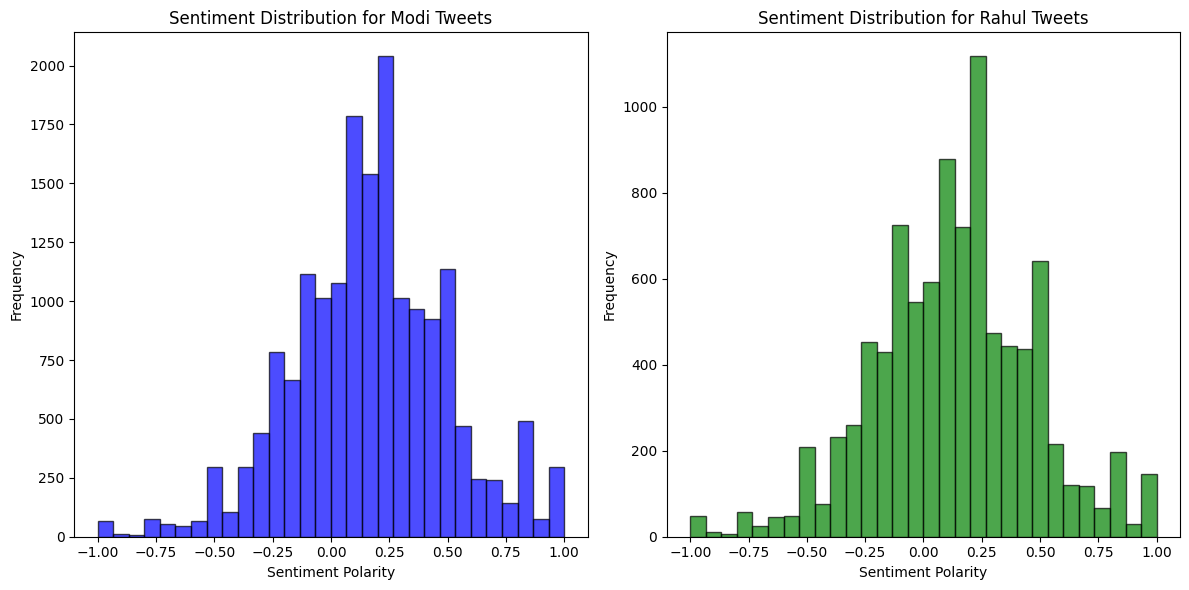

In [45]:
import matplotlib.pyplot as plt
#Plotting the sentiment distribution
plt.figure(figsize=(12, 6))

#Modi reviews sentiment distribution
plt.subplot(1, 2, 1)
plt.hist(modi['polarity'], bins=30, color='blue', alpha=0.7, edgecolor='black')
plt.title('Sentiment Distribution for Modi Tweets')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')

#Rahul reviews sentiment distribution
plt.subplot(1, 2, 2)
plt.hist(rahul['polarity'], bins=30, color='green', alpha=0.7, edgecolor='black')
plt.title('Sentiment Distribution for Rahul Tweets')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig('matplotlib_figure.png', dpi=300)  # Adjust dpi as needed
plt.show()
